In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
S = pd.read_excel('data/s1.xlsx')

In [3]:
S.head()

,age,death,gen,lon,lat,gamma,delta,mu,organism
0,35,NaN,15,40,-81,0.348434,0.01,0.1,plant
1,23,NaN,9,40,-81,0.346003,0.01,0.1,plant
2,23,NaN,12,40,-81,0.374041,0.01,0.1,plant
3,20,NaN,6,40,-81,0.351241,0.01,0.1,plant
4,20,NaN,8,40,-81,0.358171,0.01,0.1,plant


In [29]:
S['target'] = [1 if x.death > 0 else 0 for i, x in S.iterrows()]

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()
X, y = scaler.fit_transform(S[['age', 'gamma']]), S.target.values

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


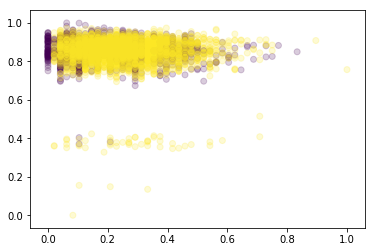

In [32]:
plt.scatter(X[:,0], X[:,1], alpha=0.2, c=y)
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [45]:
nb = GaussianNB()
knn = KNeighborsClassifier()

In [46]:
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [47]:
y_pred = nb.predict(X_test)
k_pred = knn.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
cm = confusion_matrix(y_test, k_pred)

In [50]:
tn, fp, fn, tp = cm.ravel()

In [51]:
print(classification_report(y_test, k_pred))

              precision    recall  f1-score   support

           0       0.58      0.35      0.44       235
           1       0.71      0.86      0.78       425

   micro avg       0.68      0.68      0.68       660
   macro avg       0.65      0.61      0.61       660
weighted avg       0.66      0.68      0.66       660



In [52]:
cm

array([[ 83, 152],
       [ 59, 366]])